In [40]:
import os
import cv2
import pandas as pd
import numpy as np
from rich import print
import matplotlib.pyplot as plt
from IPython.display import display

from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import tol_colors as tc

cset = tc.tol_cset('bright')


In [ ]:
#!WIP --- something like this.

log_dir = "data_full/yolact/2022-05-02_kalo_qundis/training_2022-05-02-16꞉44/logs"

extract_data_from = ["train_epoch_total", "val_epoch_total"]

def tabulate_events(dpath):
    final_out = {}
    
    for folder_path in list(filter(os.path.isdir, [os.path.join(dpath,x) for x in os.listdir(dpath)])):
        folder = os.path.basename(folder_path)

        if extract_data_from is None or folder in extract_data_from:
    
            for dname in os.listdir(folder_path):
                ea = EventAccumulator(os.path.join(folder_path, dname)).Reload()
                tags = ea.Tags()['scalars']

                out = {}

                for tag in tags:
                    tag_values=[]
                    wall_time=[]
                    steps=[]

                    for event in ea.Scalars(tag):
                        tag_values.append(event.value)
                        wall_time.append(event.wall_time)
                        steps.append(event.step)
                        
                    out[tag] = pd.DataFrame(tag_values, columns=[tag], index=steps)

                if len(tags) == 1:
                    final_out[tags[0]] = out[tags[0]]
                else:
                    df = pd.concat(out.values())
                    final_out[dname] = df
    
    
    df_all = pd.concat(final_out.values(), axis=1)
    
    print(df_all.head())
    print(df_all.describe())
    print("min", df_all.min())
    print("idxmin", df_all.idxmin())
    
    idxmin = df_all.idxmin()
    print(idxmin["val/epoch"])
    val_min_row = df_all.loc[idxmin["val/epoch"]]
    print("validation min and corresponding train result", val_min_row)
    
    df_all.plot()
    
    # for key, df in final_out.items():
    #     # print(df)
    #     print("name", df.columns[0])
    #     display(df.head())
        
    #     # print(key)
    #     print(df.describe())
    #     print("min", df.min())
    #     print("idxmin", df.idxmin())
        
    #     df.plot()


    


tabulate_events(log_dir)

In [26]:
# plot classifier

log_dir = os.path.expanduser("~/device_reid/results/2024-03-21__15-58_classify_WORKING/lightning_logs/version_0/events.out.tfevents.1711036700.frankfurt.8017.0")


def tabulate_events(log_path):

    ea = EventAccumulator(log_path).Reload()
    tags = ea.Tags()['scalars']

    out = {}

    for tag in tags:
        tag_values=[]
        wall_time=[]
        steps=[]

        for event in ea.Scalars(tag):
            tag_values.append(event.value)
            wall_time.append(event.wall_time)
            steps.append(event.step)
            
        out[tag] = pd.DataFrame(tag_values, columns=[tag], index=steps)
        print("tag:", tag)
        # print("out[tag]", out[tag])
        # out[tag].plot()
    return out


out = tabulate_events(log_dir)

tag: hp_metric

tag: val/seen_val/loss_epoch

tag: val/seen_val/acc_epoch

tag: train/loss_epoch

tag: train/acc_epoch

tag: train/loss_step

tag: train/acc_step

tag: epoch

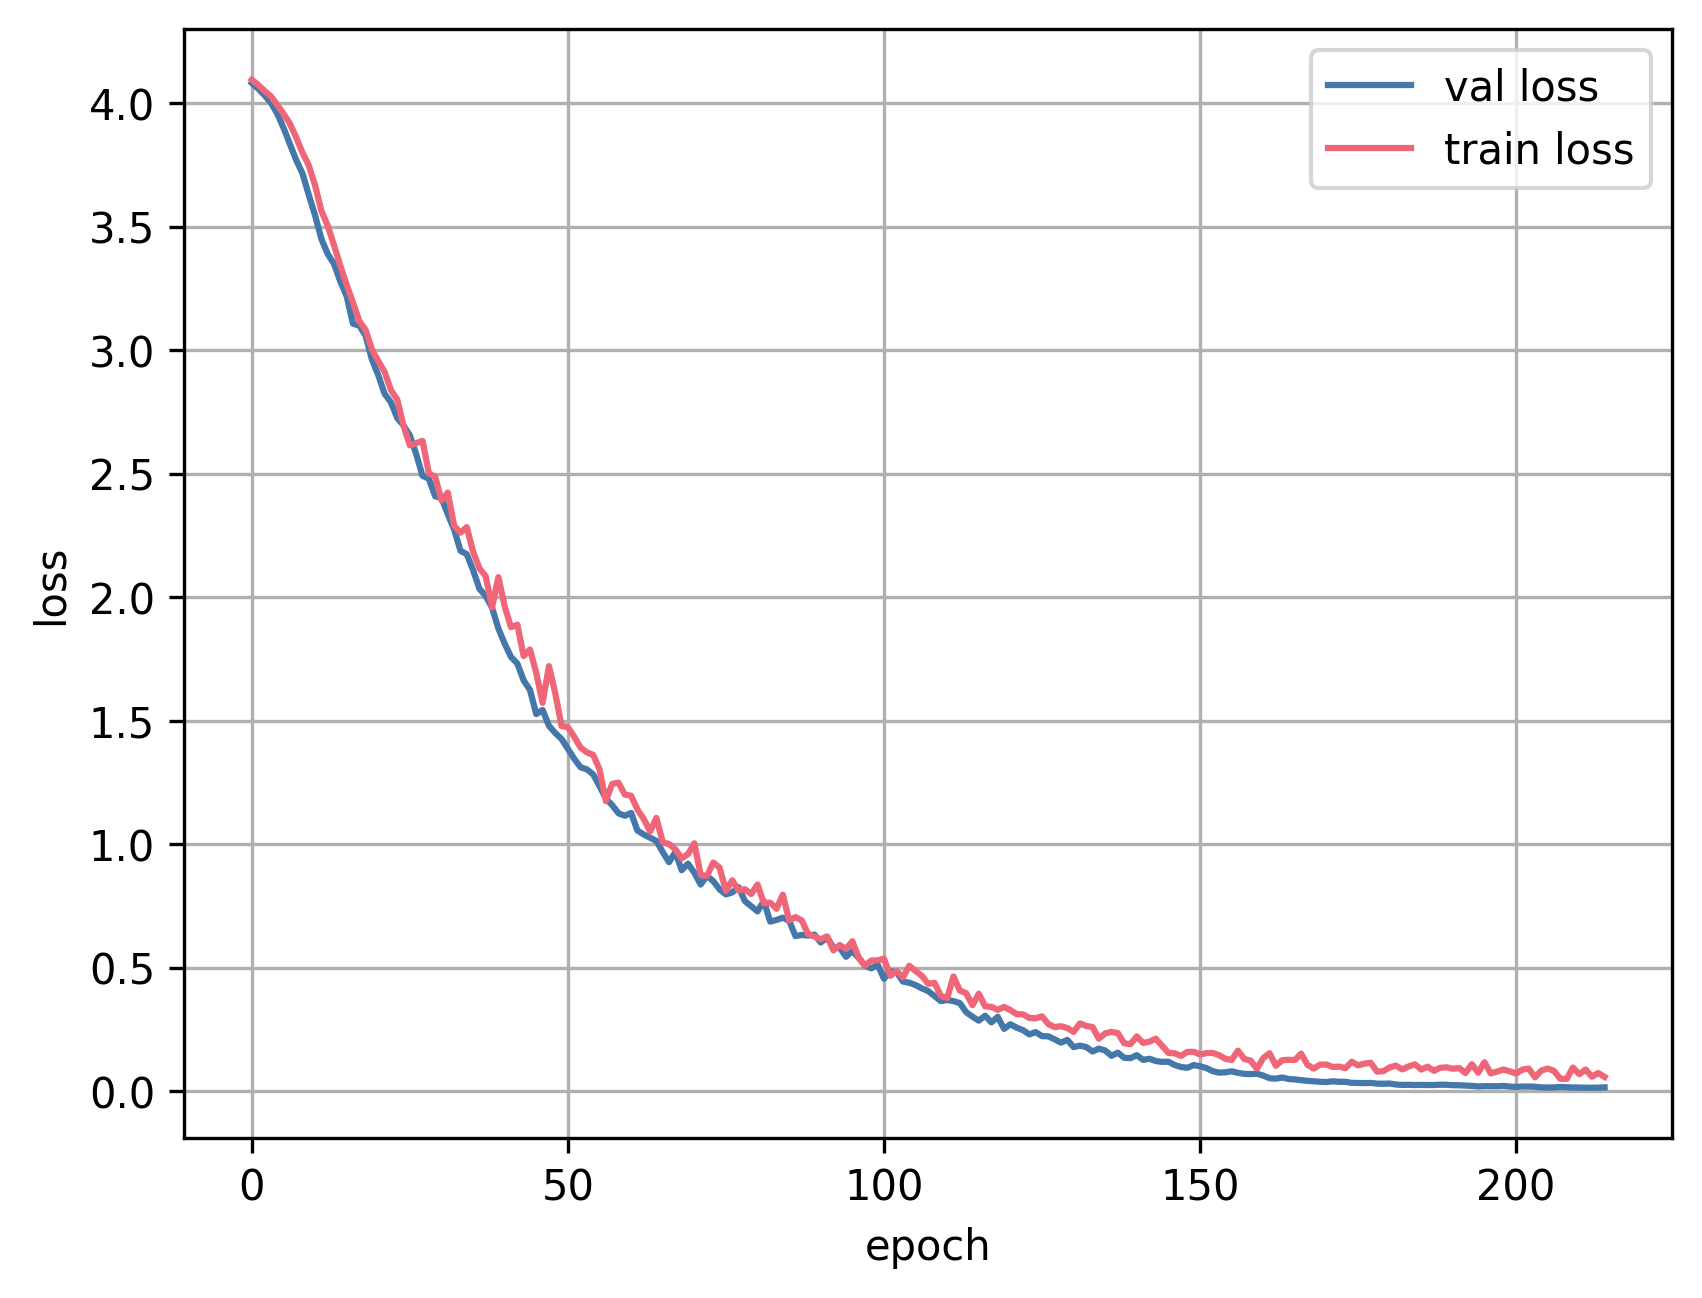

In [44]:
wanted_keys = ["val/seen_val/loss_epoch", "train/loss_epoch"]
out_subset = dict((k, out[k]) for k in wanted_keys if k in out)
df = pd.concat(out_subset.values())

fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)
ax.plot(df["val/seen_val/loss_epoch"], label="val loss", color=cset[0])
ax.plot(df["train/loss_epoch"], label="train loss", color=cset[1])
plt.legend(loc="upper right")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid(True)
plt.show()

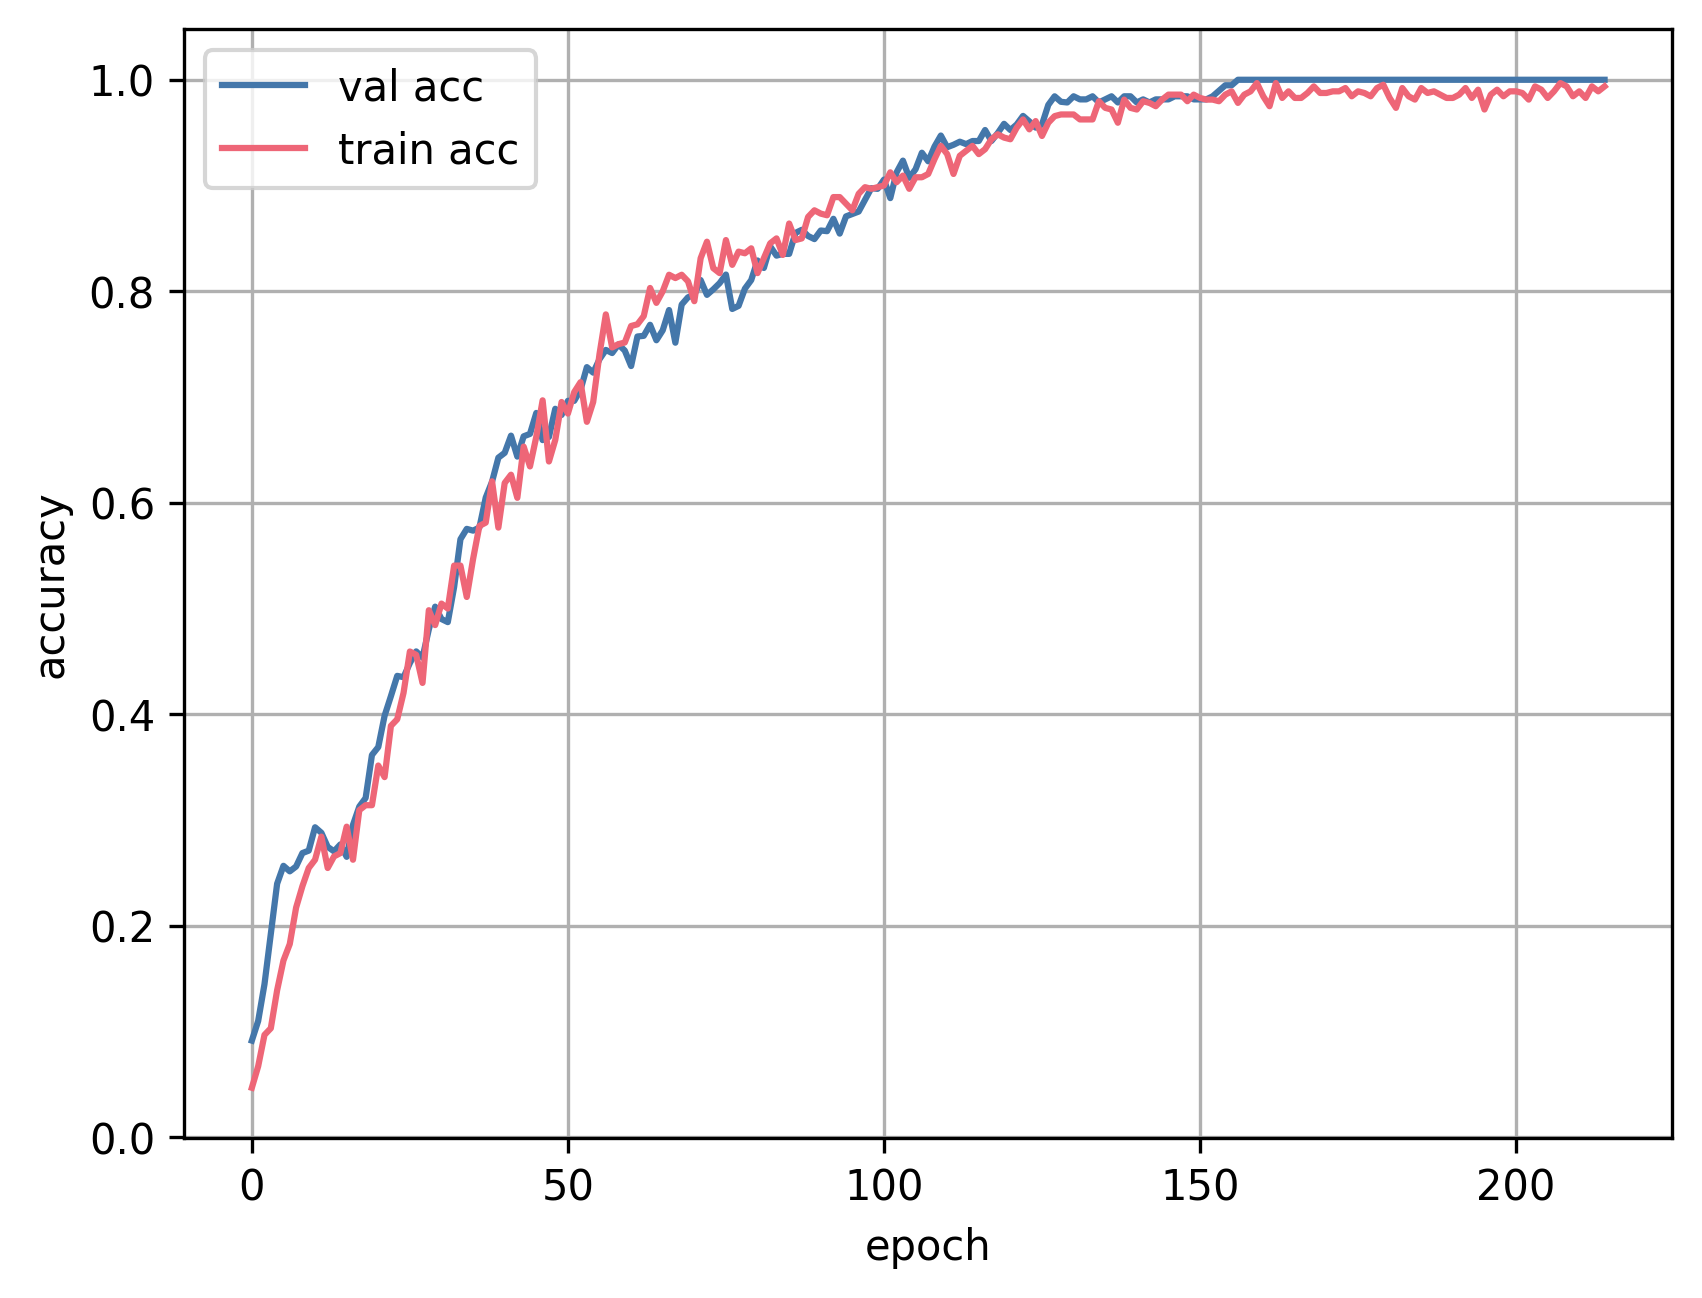

In [46]:
wanted_keys = ["val/seen_val/acc_epoch", "train/acc_epoch"]
out_subset = dict((k, out[k]) for k in wanted_keys if k in out)
df = pd.concat(out_subset.values())

fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)
ax.plot(df["val/seen_val/acc_epoch"], label="val acc", color=cset[0])
ax.plot(df["train/acc_epoch"], label="train acc", color=cset[1])
plt.legend(loc="upper left")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid(True)
plt.show()

In [24]:
# out["val/seen_val/loss_epoch"].plot()
# out["val/seen_val/acc_epoch"].plot()
# out["train/loss_epoch"].plot()
# out["train/acc_epoch"].plot()